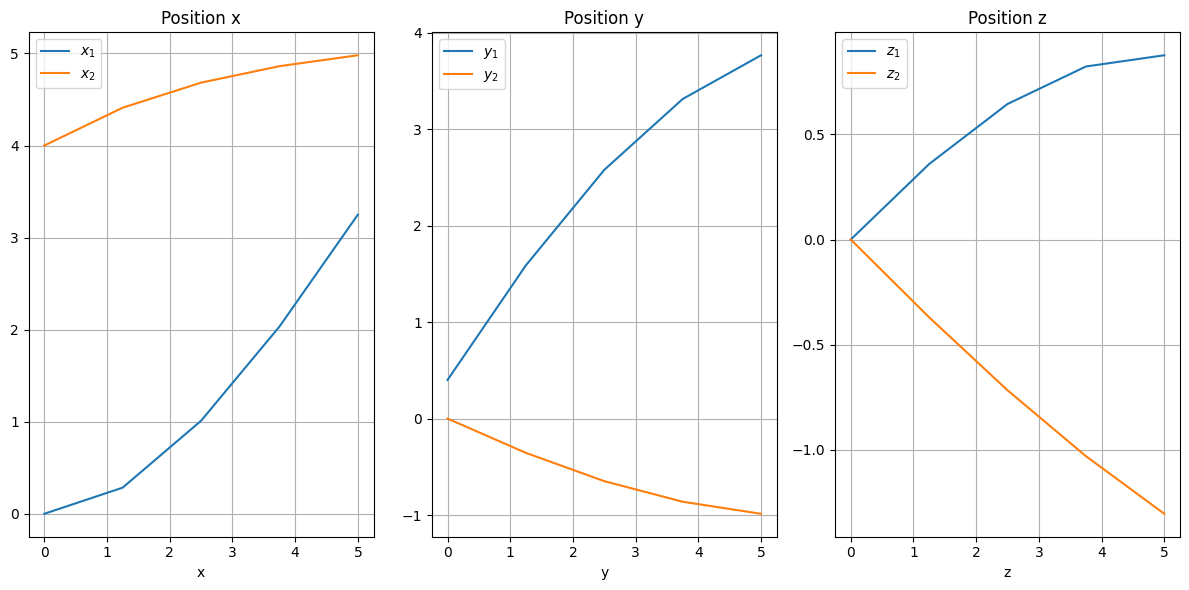

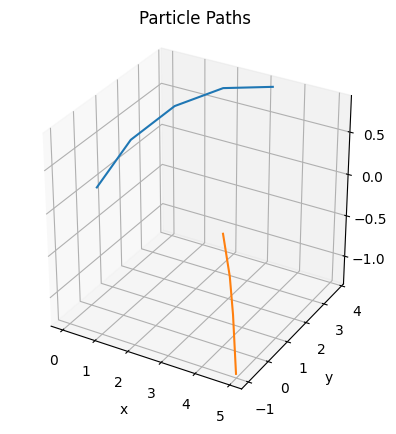

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#### Simulate gravity ####
# assign constants
G = 6.6743 * 10**-11
m_1 = 9**11
m_2 = 10**11

# initial conditions
x_1_0=0
x_1_dot_0=0
x_2_0=4
x_2_dot_0=0.4
y_1_0=0.4
y_1_dot_0=1
y_2_0=0
y_2_dot_0=-0.3
z_1_0=0
z_1_dot_0=0.3
z_2_0=0
z_2_dot_0=-0.3
x0 = np.array([x_1_0, x_1_dot_0, x_2_0,x_2_dot_0,y_1_0,y_1_dot_0,y_2_0,y_2_dot_0,z_1_0,z_1_dot_0,z_2_0,z_2_dot_0])


# System of ODE:
def Gravity_Sim_ODE(t, y):
    x_1 = y[0]
    x_1_dot = y[1]
    x_2 = y[2]
    x_2_dot = y[3]
    y_1 = y[4]
    y_1_dot = y[5]
    y_2 = y[6]
    y_2_dot = y[7]
    z_1 = y[8]
    z_1_dot = y[9]
    z_2 = y[10]
    z_2_dot = y[11]
    
    return (x_1_dot,
            G*m_2*(-x_1 + x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2),
            x_2_dot,
            G*m_1*(x_1 - x_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2),
            y_1_dot,
            G*m_2*(-y_1 + y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2),
            y_2_dot,
            G*m_1*(y_1 - y_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2),
            z_1_dot,
            G*m_2*(-z_1 + z_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2),
            z_2_dot,
            G*m_1*(z_1 - z_2)/(x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2 + z_1**2 - 2*z_1*z_2 + z_2**2)**(3/2)
            )

# solve the ODE, evaluate at 30 fps
sol = solve_ivp(Gravity_Sim_ODE, [0, 5], x0, 
    t_eval=np.linspace(0,5,5*1))

# output of the solver
x_1 = sol.y[0]
x_2 = sol.y[2]
y_1 = sol.y[4]
y_2 = sol.y[6]
z_1 = sol.y[8]
z_2 = sol.y[10]

t = sol.t

#plot x and y over time
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].plot(t, x_1, label="$x_1$")
axs[0].plot(t, x_2, label="$x_2$")
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("time (s)")
axs[0].set_xlabel("x")
axs[0].set_title('Position x')

axs[1].plot(t, y_1, label="$y_1$")
axs[1].plot(t, y_2, label="$y_2$")
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("time (s)")
axs[1].set_xlabel("y")
axs[1].set_title('Position y')

axs[2].plot(t, z_1, label="$z_1$")
axs[2].plot(t, z_2, label="$z_2$")
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel("time (s)")
axs[2].set_xlabel("z")
axs[2].set_title('Position z')
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()
# paths of the two bodies:
#paths over time (3d plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_1, y_1, z_1)
ax.plot(x_2, y_2, z_2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Particle Paths')
ax.set_box_aspect([1, 1, 1])
plt.show()
plt.close()



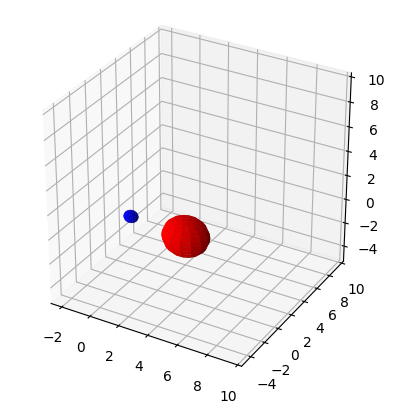

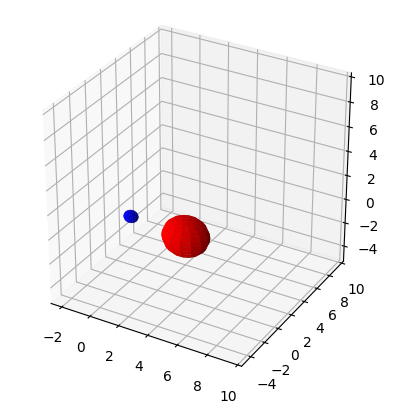

In [21]:
# Animate gravity simulation
import matplotlib.animation as animation
#from ffmpeg import FFmpeg
from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle
# output of the solver
x_1 = sol.y[0]
x_2 = sol.y[2]
y_1 = sol.y[4]
y_2 = sol.y[6]
z_1 = sol.y[8]
z_2 = sol.y[10]
t = sol.t

#snapshot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',aspect='equal')
def def_axis():
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim(-2.5, 10)
    ax.set_ylim(-5, 10)
    ax.set_zlim(-5, 10)
def_axis()

s_1= m_1/max([m_1,m_2])*1.5
s_2= m_2/max([m_1,m_2])*1.5



u = np.linspace(0, 2 * np.pi, 15)
v = np.linspace(0, np.pi, 15)
x_sphere1 = s_1 * np.outer(np.cos(u), np.sin(v)) 
y_sphere1 = s_1 * np.outer(np.sin(u), np.sin(v))
z_sphere1 = s_1 * np.outer(np.ones(np.size(u)), np.cos(v))
sphere1 = ax.plot_surface(x_sphere1+ x_1_0, y_sphere1+ y_1_0, z_sphere1+ z_1_0, color='b')

x_sphere2 = s_2 * np.outer(np.cos(u), np.sin(v)) 
y_sphere2 = s_2 * np.outer(np.sin(u), np.sin(v)) 
z_sphere2 = s_2 * np.outer(np.ones(np.size(u)), np.cos(v)) 
sphere2 = ax.plot_surface(x_sphere2+ x_2_0, y_sphere2+ y_2_0, z_sphere2+ z_2_0, color='r')
plt.show()
plt.savefig('gravity_sim_3d.png')
plt.close()

#animation:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',aspect='equal')
def_axis()


def animate(i):
    ax.clear()
    def_axis()
    px_1 = x_1[i]
    px_2 = x_2[i]
    py_1 = y_1[i]
    py_2 = y_2[i]
    pz_1 = z_1[i]
    pz_2 = z_2[i]

    sphere1 = ax.plot_surface(x_sphere1 + px_1, y_sphere1 + py_1, z_sphere1 + pz_1, color='b')
    sphere2 = ax.plot_surface(x_sphere2 + px_2, y_sphere2 + py_2, z_sphere2 + pz_2, color='r')

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ani.save('gravity_sim_3d.gif', writer='pillow', fps=FPS)


In [4]:
#test comment